# The Sparks Foundation

## Task1: Predict the percentage of student based on number of study hours

#### Dataset link :- https://bit.ly/w-data

### Author : Rhtyhm Kaushik


In [1]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Data Science\Spark Foundation\DataSet/student_scores - student_scores.csv")

### Inspecting the dataframe

inspecting the dataframe for dimensions, null-values, and summary of different columns

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

In [8]:
# This id to ignore warning
import warnings as wgs
wgs.filterwarnings("ignore")

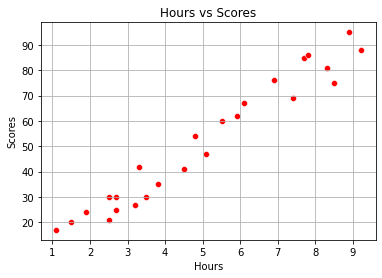

In [9]:
sns.scatterplot("Hours","Scores",color='r',data=df)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

#### Preparing the Data

In [10]:
X = df.drop('Scores',axis=1)
y = df['Scores']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)

In [12]:
print('X_train is', X_train.shape)
print('X_test is', X_test.shape)

X_train is (20, 1)
X_test is (5, 1)


In [13]:
print('y_train is', y_train.shape)
print('y_test is', y_test.shape)

y_train is (20,)
y_test is (5,)


#### Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [15]:
print("The intercept term of the linear model",LR.intercept_)
print("The coefficient term of the linear model",LR.coef_)

The intercept term of the linear model 2.018160041434683
The coefficient term of the linear model [9.91065648]


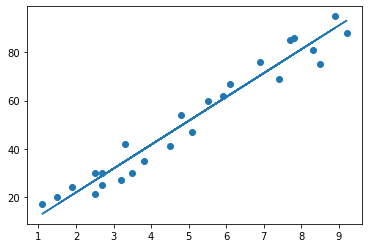

In [16]:
#plotting the line(y=mx+c)
line = LR.coef_ * X + LR.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [17]:
test_pred = LR.predict(X_test)

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [19]:
#Testing with data
hours = 9.25
random_pred = LR.predict([[hours]])
print("The Predicted Score if person studies for",hours,'hours is ', random_pred[0])

The Predicted Score if person studies for 9.25 hours is  93.69173248737538


#### Evaluating the Model

In [20]:
from sklearn import metrics
print("Mean Squared Error is ",metrics.mean_squared_error(y_test,test_pred))
print("Mean Absolute Error is ",metrics.mean_absolute_error(y_test,test_pred))

Mean Squared Error is  21.5987693072174
Mean Absolute Error is  4.183859899002975
